# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


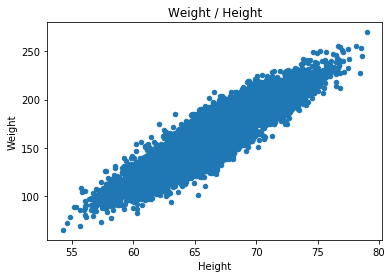

In [29]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight / Height')

In [30]:
X = df[['Height']].values
y_true = df['Weight'].values

In [31]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

## Linear Regression with Keras

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [33]:
model = Sequential()

In [34]:
model.add(Dense(1, input_shape=(1,)))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [37]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 853.5042     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 581.0934     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 513.1925     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 482.5812     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 427.7425     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 371.7201     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 359.2920     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 312.4876     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 303.3391     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 266.4772     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 243.2128     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 235.2977     
E

In [38]:
y_pred = model.predict(X).ravel()

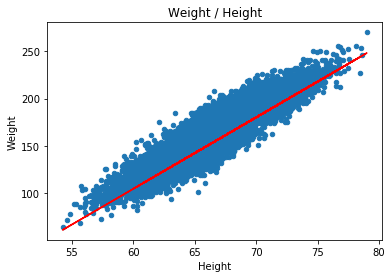

In [39]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight / Height')
plt.plot(X, y_pred, color='red')

In [15]:
W, B = model.get_weights()

In [16]:
W

array([[ 7.64754963]], dtype=float32)

In [17]:
B

array([-348.57876587], dtype=float32)

### Save Keras Model


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.save('HeightWeight_model.h5')

### Export Model using CoreML Tools


In [20]:
from keras.models import load_model  
model = load_model('HeightWeight_model.h5')  

In [21]:
import coremltools

In [22]:
coreml_model = coremltools.converters.keras.convert(model, input_names="height", output_names="weight")

0 : dense_1_input, <keras.engine.topology.InputLayer object at 0x121ad3590>
1 : dense_1, <keras.layers.core.Dense object at 0x121ad3510>


In [25]:
coreml_model.save('HeightWeight_model.mlmodel')

### Test CoreML Model

In [26]:
coreml_model

input {
  name: "height"
  type {
    multiArrayType {
      shape: 1
      dataType: DOUBLE
    }
  }
}
output {
  name: "weight"
  type {
    multiArrayType {
      shape: 1
      dataType: DOUBLE
    }
  }
}

In [27]:
coreml_model.predict({'height' : [73.84]})

{u'weight': array([ 216.11624146])}